# Handwritten digits recognition 



## What this is about?
The handwritten digit recognition is the ability of computers to recognize human handwritten digits. Handwritten digits are not perfectly written which makes it hard for machine to recognize them. Handwritten digits recognition could be a solution for several problems, such as those which use the image of a digit and recognizes the digit present in the image, for example.

## Install vectice 

Vectice provides a generic metadata layer that is potentially suitable for most data science workflows.

For this tutorial we will use the keras library for modeling and track experiments directly through our Python SDK to illustrate how to fine-tune exactly what you would like to track: metrics, etc. The same mechanisms would apply to R, Java or even more generic REST APIs to track metadata from any programming language and library.

In [ ]:
!pip3 install vectice

In [ ]:
!pip show vectice

## Install the necessary libraries for this project

In [ ]:
!pip3 install tensorflow
!pip3 install keras
!pip3 install pillow
!pip3 install numpy

## Import the libraries and the dataset

In [ ]:
# organize imports
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from vectice.models import JobType

# fix a random seed for reproducibility
np.random.seed(9)

## User inputs for the model

In [ ]:
# user inputs
nb_epoch = 25
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784



- **nb_epoch**: Number of epochs. An epoch is an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
- **num_classes**: Digits classes (from 0 to 9)
- **bacth_size**: It defines the number of samples that will be propagated through the network. For exampe, if we have 1000 training samples, with a batch_size of 100 the model will train on the first 100 training samples then, the second 100 training sample on so on to the end of the training set. 
- **train_size**: Number of images in the training set
- **test_size**: Number of images in the test set
- **v_length**: Dimension of flattened input image size i.e. if input image size is [28x28], then v_length = 784

## Process the data

In this tutorial we will use the MNIST keras dataset. The MNIST dataset is a low-complexity data collection of handwritten digits containing 70,000 28x28 black and white images representing the digits zero through nine. It's used to train and test various supervised machine learning algorithms.


In [ ]:
# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


trainData contains the data from which our neural network (model) will learn to recognize images and trainLabels contains the labels (what's in the picture). testData will be used to check if the model can correctly recognize a digit that it hasn't sees before. To evaluate this we will use DataLabels which contains labels for the test set

### Reshape and normalize the data
**Reshaping**

If we process an image in a neural network, it expects a vector and not a two-dimensional array (unless we use a convolution). Therefore, before further processing, we should convert the training set to 60,000 x 784 (28 * 28). To change the shape of the data we will use the reshape function.

**Normalization**

The value of each pixel – indicating the gray level of a given pixel – should be between 0 (typically 0 is completely black) and 255. We divide our data by 255 to make sure that it's between 0 and 1.

In [ ]:
# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 784)
[INFO] test data shape: (10000, 784)
[INFO] train samples: 60000
[INFO] test samples: 10000


In the process, we want the neural network to compare two values and then calculate how far is it from the target. This cannot be done without transforming the target (labels) into so-called one-hot encoding. As a result, our “1” will be written in the following form:

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

If we wanted to write the value 5 in this way, the vector would look like this:

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

This operation of converting a scalar to a vector is performed by the function to_categorical().



In [ ]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

## Connect to your Vectice workspace and your Vectice project

Here we are going to need an API token and a project token. An API token is used to secure requests between your existing tools and Vectice. You can create and manage those at the API Tokens tab in your workspace, and they impersonate you and your rights per workspace, so we strongly recommend you to avoid sharing them. A project token is used to target the project you're working on in the UI and can found (after creating a project) in the Project settings page, and anyone working on the project can see it and copy/paste it.

In [ ]:
# In order to use Vectice SDK, let's set up the configurations first.
# The Vectice API key below can be generated from the UI.
# For better security, the settings can also be put into a dedicated file called `.vectice` or `.env`.
## Make sure that you're using the right endpoint (hint: be-beta.vectice.com)
os.environ['VECTICE_API_ENDPOINT']= ""
os.environ['VECTICE_API_TOKEN'] = ""

## Create a Vetice instance to connect to your project using your project token
## Hint: Do not forget to import vectice (from vectice import Vectice)
vectice = ""

print(vectice)

In [ ]:
#@title Double click to show the syntax
os.environ['VECTICE_API_ENDPOINT']= "be-beta.vectice.com"
##Complete with your Vectice API token
os.environ['VECTICE_API_TOKEN'] = ""
from vectice import Vectice
## Complete with your project token
vectice = Vectice(project_token="")
print(vectice)

Create a dataset containing your dataset to use them as input for your models. That can be done through the UI by going to your project, clicking on datasets and then click on add (you should add a connection to be able to create a dataset)

Create a dataset version based on the dataset you created above

In [ ]:
input_ds_version = ""

In [ ]:
#@title Double click to show the syntax
##We use autoversioning here
input_ds_version = vectice.create_dataset_version().with_parent_name("dataset_name")

## Get different user versions
Generate a random user version by calling get_random_string

In [ ]:
# Let's generate some unique names for our following modeling experiments
import random
import string
def get_random_string(length):
    return "".join(random.choice(string.ascii_letters) for i in range(length))


## Model creation

We are using a [sequential model](https://keras.io/getting-started/sequential-model-guide/) (a Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor) and two types of layers: Dense and Dropout.
Dense is a standard layer of the neural network in which each neuron is connected to each neuron of the next layer. Dropout is a layer that prevents the phenomenon of over-fitting, i.e. over-matching the operation of the neural network to training data. 
- We are using 3 Dense layers and 2 Dropout layers.
-  Each layer has an activation function. Activation functions available in Keras are listed here: https://keras.io/activations/
- Each layer as the first argument takes the size of the output vector for the layer (the first layer accepts 784 parameters and outputs 512)
- We use Dropout in our neural network to save it from overfitting. To prevent overfitting, it randomly chooses a fraction of units and set to 0 at each update


The following code creates a DNN (Dense Neural Network) model. Complete the code by creating and starting a job run.

In [ ]:
# create a run
# Start the run

model = Sequential(name="Digits_recognition_sequential")
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

In [ ]:
#@title Double click to show the answer
# create the model
vectice.create_run(job_name = "Train model with keras", job_type = JobType.TRAINING)

vectice.start_run(inputs=[input_ds_version])

model = Sequential(name="Digits_recognition_sequential")
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

Here we define a list containing information about each layer in our neural network

In [ ]:
layers_list = []
for layer in model.layers:
  layers_list+=[("Layer name", layer.name+" layer"), (layer.name+" layer "+" number of input parameters", layer.input_shape[1]),(layer.name+" layer "+" number of output parameters",layer.output_shape[1])]
layers_list

After creating the model, we have to compile it. To do this, we call the method compile specifying:
- Type of optimizer: https://keras.io/optimizers/
- Loss function: https://keras.io/losses/
- Optional metrics that we want for our model to register (accuracy for example)

In [ ]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Implementing the training of the neural network by using the fit method.

You can try to play with the network – change the number of epochs, batch_size, type of optimizer or the structure of the network itself.

In [ ]:
# fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)

## Model evaluation

Here we calculate some metrics in order to evaluate the model.
We already created a job run aboce and started it. Please complete the code by creating a model version, adding the metrics and the parameters (properties) to it and end the run.

In [ ]:
# print the history keys
print(history.history.keys())
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

## Create metrics list
## Create properties list (you can use the list layers_list we defined above)
##Create model_version()
##End the job run you created

In [ ]:
#@title double click to show the answer
# print the history keys
print(history.history.keys())
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))


metrics = [('test score',scores[0]), ("test accuracy",scores[1])]

properties = [("Algorithm","Neural networks"), ("Model", "Sequential (keras)")] +layers_list+ [("Number of epochs",nb_epoch), ("number of digit classes (from 0 to 9) ", num_classes), ("Batch size ", batch_size), ("Number of images in the training set ", train_size), ("Number of images in the test set ", test_size), ("Dimension of flattened input image size", v_length)]
model_version1 = vectice.create_model_version().with_parent_name("DNN__").with_properties(properties).with_metrics(metrics).with_user_version(get_random_string(12))


vectice.end_run(outputs=[model_version1])

The model's got an accuracy of 0.9826 on the test set. The difference between accuracy on the training and test set is only 0.01% and seems great

We can use our testData to test the model on picture it hasn't seen before. We can do so by using model.predection in keras

In [ ]:
predictions = model.predict(testData[0:100])

The method returns a 100-element scoreboard. Each element indicates the probabilities that the input belongs to a given class.

In [ ]:
predictions[0]

array([8.37433046e-16, 1.08782815e-14, 2.97688379e-16, 4.90299431e-14,
       8.15111303e-18, 4.19393303e-16, 3.04530058e-19, 1.00000000e+00,
       1.25218924e-19, 1.94541258e-11], dtype=float32)

As we can see in this example the probabilities are very low except for the eight element (class 7, counted from 0) wich has a probability of 1. So the model predicted that it's 7. Let's verify that

In [ ]:
np.argmax(predictions[0])

7

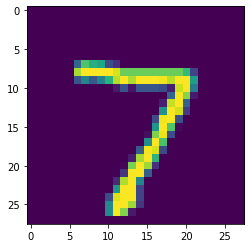

In [ ]:
plt.imshow(testData[0].reshape(28,28))

As you can see the number is 7

We can take a look at the predictions (after treating the probabilities with the argmax function and specifying to the function in what dimension it should analyze data (in our case, along the y axis, i.e. axis = 1) because we are using a two-dimensional array)

In [ ]:
np.argmax(predictions, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

We can check the labels for the data on which the model did the predictions and compare

In [ ]:
testLabels[0:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [ ]:
np.argmax(predictions, axis=1) == testLabels[0:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
np.mean(np.argmax(predictions, axis=1) == testLabels[0:100])


1.0

The predictions coincide with reality

We can also verify if there are wrong predictions by running this cell which uses Numpy's argmin function

In [ ]:
wrong_pred = np.argmin(np.argmax(predictions, axis=1) == testLabels[0:100])
wrong_pred

0

No element was wrongly predicted (for example, if wrong_pred=2 we can say that the the element in the position 2 is wrongly predicted)